# Machine Learning
## Programming Assignment 2: KNN

#### Instructions:
The aim of this assignment is to give you hands-on experience with a real-life machine learning application.
You will be analyzing the sentiment of tweets using KNN classification.
You can only use the Python programming language and Jupyter Notebooks.
Please use procedural programming style and comment your code thoroughly.
There are two parts of this assignment. In part 1, you can use NumPy, Pandas, Matplotlib, and any other standard Python libraries. You are not allowed to use NLTK, scikit-learn, or any other machine learning toolkit. You can only use scikit-learn in part 2.

### Part 1: Implementing KNN classifier from scratch (75 marks)

You are not allowed to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own KNN classifier from scratch. You may use Pandas, NumPy, Matplotlib, and other standard Python libraries.

#### Problem:
The purpose of this assignment is to get you familiar with the k nearest neighbor classification. You are given the ‘Apple Sentiment Tweets’ dataset that contains around 1630 tweets about Apple labeled as positive, neutral and negative in the form of 1, 0, and -1 respectively. Your task is to implement the k nearest classifier and use it for predicting the sentiments of the tweets about Apple.


In [34]:
## Here are the libraries you will need for this part
import pandas as pd
import numpy as np
import scipy.spatial as sc
import matplotlib.pyplot as plt
import re
import random

# Read the dataset
df = pd.read_csv("Apple Sentiment Tweets.csv")
df


,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0
...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1
1626,Finally got my iPhone 6 in the mail and it com...,-1
1627,@umo_games @Apple ended up getting a new compu...,0
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0


In [35]:
# count no of positive, neutral and negative tweets

pos_tweets = df[df["sentiment"] == 1].shape[0]
neu_tweets = df[df["sentiment"] == 0].shape[0]
neg_tweets = df[df["sentiment"] == -1].shape[0]

print("No of Positive Tweets : ", pos_tweets)
print("No of Neutral Tweets : ", neu_tweets)
print("No of Negative Tweets : ", neg_tweets)

No of Positive Tweets :  143
No of Neutral Tweets :  801
No of Negative Tweets :  686


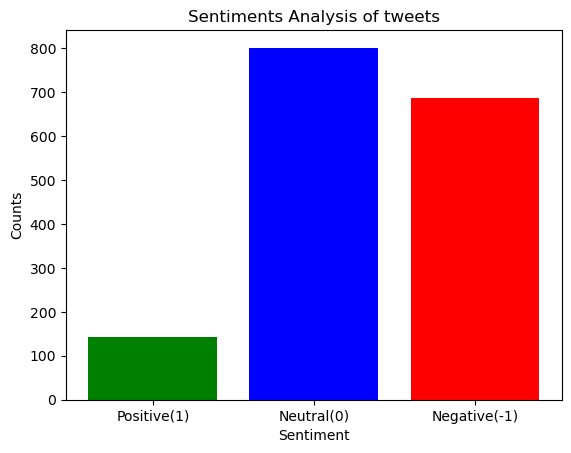

In [36]:
# Show on bar graph

sentiments = ["Positive(1)", "Neutral(0)", "Negative(-1)"]
counts = [pos_tweets, neu_tweets, neg_tweets]

plt.bar(sentiments, counts, color=["green", "blue", "Red"])
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.title("Sentiments Analysis of tweets")
plt.show()

In [37]:
# Function to clean and preprocessing the tweets

def cleaning(tweet):
    tweet = tweet.lower() # convert tweet into lowercase 
    tweet = re.sub(r'[^\w\s]', '', tweet) # Remove special characters
    
    return tweet

In [38]:
# Function to calculate euclidean distance b/w two tweets

def euclidean(t1, t2):
    words_t1 = set(t1.split())
    words_t2 = set(t2.split())
    
    distance = len(words_t1.symmetric_difference(words_t2))
    return distance

In [39]:
# Function to predict the sentiments using KNN classifier

def Predict_KNN(tweet, k=3): # because positive, neutral and negative are 3 classes
    processed = cleaning(tweet)
    dist = [(euclidean(processed, cleaning(row['text'])), row['sentiment']) for _, row in df.iterrows()]   
    dist.sort(key=lambda x: x[0])
    neighbors = dist[:k]
    sentiment_count = {1:0, 0:0, -1:0}
    
    for _,sent in neighbors:
        sentiment_count[sent] += 1
        
    predicted_sentiment = max(sentiment_count, key=sentiment_count.get)
    return predicted_sentiment


In [40]:
# New Tweet about Apple

new_tweet = "Apple is much complicated as compare to andriod"

# Predict sentiment of above new tweet using KNN-algorithm
prediction = Predict_KNN(new_tweet, k=3)

print("Predicted Sentiment about the tweet on Apple: ", prediction)
if prediction == 1:
    print("Positive")
elif prediction == 0:
    print("Neutral")
elif prediction == -1:
    print("Negative")

Predicted Sentiment about the tweet on Apple:  -1
Negative


In [41]:
# Check is it predicting true or not

# Now i am checking to predict tweet number2 of the dataset and sentiment of that tweet is 1(positive) in the dataset
# Then my knn algorithm must print same as available in dataset

new_tweet = df["text"][2] # 2nd tweet of datasset having sentiment (1)

# Predict sentiment of above new tweet using KNN-algorithm
prediction = Predict_KNN(new_tweet, k=3)

print("Predicted Sentiment about the 2nd weet available in dataset: ", prediction)
if prediction == 1:
    print("Positive")
elif prediction == 0:
    print("Neutral")
elif prediction == -1:
    print("Negative")

# Its is prediciting it as (1) it means our model is working good

Predicted Sentiment about the 2nd weet available in dataset:  1
Positive


#### Task 1.1: Dataset (5 points)
The dataset contains around 1,630 tweets. There are only two columns in the dataset:
Text: Contains the text of the tweet
Sentiment: Contains the sentiment of the tweet which is divided into three classes: 1 (positive), -1 (negative), and 0 (neutral).

Your task is to read the dataset and stopwords file into a useful data structure. Print out a few tweets and a few items from the stop word list, succesfully being able to do this will earn you 5 points.

In [42]:
import pandas as pd

df = pd.read_csv("Apple Sentiment Tweets.csv")

# Display the first few rows of the dataset
print("Sample tweets from the dataset:")
print(df.head())

with open("stop_words.txt", "r") as file:
    stopwords = file.read().splitlines()

# Display a few stopwords
print("\nSample stopwords:")
print(stopwords[:10]) 

Sample tweets from the dataset:
                                                text  sentiment
0  Wow. Yall needa step it up @Apple RT @heynyla:...         -1
1  What Happened To Apple Inc?   http://t.co/FJEX...          0
2  Thank u @apple I can now compile all of the pi...          1
3  The oddly uplifting story of the Apple co-foun...          0
4  @apple can i exchange my iphone for a differen...          0

Sample stopwords:
['i', "i'm", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']


#### Task 1.2: Data Preprocessing (10 points)

In the preprocessing step, you’re required to remove the stop words, punctuation marks, numbers, unwanted symbols, hyperlinks, and usernames from the tweets and convert them to lower case. You may find the string and regex module useful for this purpose. Use the stop word list provided within the assignment.

Print out a few random tweets from your dataset, if they conform to the rules mentioned above, you will gain 10 points.

In [43]:
import pandas as pd
import re
import string

# Function to preprocess tweets
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@\w+', '', tweet) # Removing user names which starts with @Abcd
    tweet = re.sub(r'http\S+', '', tweet) # Removing Hyperlinks
    tweet = tweet.translate(str.maketrans('', '', string.punctuation + '0123456789')) # Removing punctuation and numbers
    tweet = ' '.join(tweet.split()) # Removing extra whitespace
    tweet = ' '.join(word for word in tweet.split() if word not in stopwords) # Removing stopwords
    return tweet

df["cleaned_text"] = df["text"].apply(preprocess_tweet)

print("Sample preprocessed tweets:")
print(df["cleaned_text"].sample(5).tolist())

df # cleaned text column having clean tweets

Sample preprocessed tweets:
['hey could make iphone charger lasts month sincerely broke high school student wants phone charged', 'app store aint working', 'youre one apparently based last interview', 'apple support twitter think', 'best stevejobs apple aapl tech via']


,text,sentiment,cleaned_text
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,wow yall needa step rt music snapchat damn tim...
1,What Happened To Apple Inc? http://t.co/FJEX...,0,happened apple inc aapl apple
2,Thank u @apple I can now compile all of the pi...,1,thank u compile pics communicate one place
3,The oddly uplifting story of the Apple co-foun...,0,oddly uplifting story apple cofounder sold sta...
4,@apple can i exchange my iphone for a differen...,0,exchange iphone different color lmao changed mind
...,...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1,pick slack fuck boys
1626,Finally got my iPhone 6 in the mail and it com...,-1,finally got iphone mail comes box busted scree...
1627,@umo_games @Apple ended up getting a new compu...,0,ended getting new computer anyhow work compute...
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0,yearold wizkid turned nabbed backing hollywood...


#### Task 1.3: Splitting the dataset (5 points)

In this part, divide the given dataset into training and testing sets based on an 80-20 split using python.
Print out the sizes of the training dataset and test dataset, training data should contain 1304 tweets and test data should contain 326 tweets. If your sizes are correct, you get full points.

In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv("Apple Sentiment Tweets.csv")
test_size = 326
train_size = df.shape[0] - test_size

# Shuffle the dataset
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset
train_df = shuffled_df[:train_size]
test_df = shuffled_df[train_size:train_size + test_size]

print(f"Training dataset size: {len(train_df)}")
print(f"Test dataset size: {len(test_df)}")


Training dataset size: 1304
Test dataset size: 326


#### Task 1.4: Feature Extraction (10 points)

In the feature extraction step, you’ll represent each tweet as a bag-of-words (BoW), that is, an unordered set of words with their position ignored, keeping only their frequency in the tweet. For example, consider the below tweets:
T1 = Welcome to machine learning!
T2 = kNN is a powerful machine learning algorithm.
The bag-of-words representation (ignoring numbers, case, and punctuation) for the above tweets are:

| Vocabulary | welcome | To | machine | learning | knn | is | a | powerful | algorithm |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| T1 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 |
| T2 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |


Note: We only use the training set to construct the vocabulary for the BoW representation.

Print out the vocabulary as well as the bow representation for a random tweet. Getting the correct output will result in full credit.

In [45]:
import pandas as pd
import string
from collections import Counter

df = pd.read_csv("Apple Sentiment Tweets.csv")

with open("stop_words.txt", "r") as file:
    stopwords = set(file.read().splitlines())

# Preprocessing function
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation + '0123456789'))
    tweet = ' '.join(tweet.split())
    tweet = ' '.join(word for word in tweet.split() if word not in stopwords)
    return tweet

train_df = df.sample(frac=0.8, random_state=42)  # Assuming 80% is used for training
train_df["cleaned_text"] = train_df["text"].apply(preprocess_tweet)

# Build vocabulary
all_words = ' '.join(train_df["cleaned_text"]).split()
vocabulary = sorted(set(all_words))

# BoW representation
def bow_representation(tweet, vocabulary):
    words = tweet.split()
    word_counts = Counter(words)
    return [word_counts.get(word, 0) for word in vocabulary]

# Select a random tweet from the training set
random_tweet = train_df.sample(1)["cleaned_text"].values[0]

# Get BoW representation for the random tweet
bow_vector = bow_representation(random_tweet, vocabulary)

print("Vocabulary:")
print(vocabulary)


Vocabulary:
['aapl', 'aapla', 'aaplafterhours', 'aaplapple', 'aaplapples', 'aaplbuzz', 'aaplcorporate', 'aaplcorrupt', 'aaplin', 'aaplinch', 'aaplipad', 'aapliphone', 'aaplis', 'aapljim', 'aaplnew', 'aaplone', 'aaplpacific', 'aaplpale', 'aaplpm', 'aaplshould', 'aaplsteve', 'aaplwatch', 'aaron', 'abandoned', 'abck', 'abe', 'ability', 'able', 'absolute', 'absolutely', 'accent', 'access', 'accessability', 'accessible', 'accessory', 'accident', 'accidentally', 'according', 'accused', 'achilles', 'act', 'acted', 'action', 'actions', 'activation', 'actor', 'actual', 'actually', 'ad', 'adapters', 'add', 'adding', 'addis', 'additional', 'address', 'adds', 'adjust', 'admire', 'admits', 'adoptions', 'ads', 'advanced', 'advertisement', 'advertising', 'af', 'africa', 'afterhours', 'agai', 'aging', 'ago', 'agree', 'agreed', 'agreedhave', 'ahahahah', 'ahead', 'aids', 'aint', 'air', 'airdrop', 'airmiles', 'airmilesshops', 'airplay', 'airport', 'aka', 'alabama', 'alarm', 'alarming', 'alarms', 'album',

In [46]:
# Representation of BoW

print("\nBag-of-Words representation for the random tweet:")
print(bow_vector)


Bag-of-Words representation for the random tweet:
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Task 1.5: Create KNN classifier (10 points)

You will create your own k-Nearest Neighbors classifier function by performing the following tasks:
- For a test data point, find its distance from all training instances.
- Sort the calculated distances in ascending order based on distance values.
- Choose k training samples with minimum distances from the test data point.
- Return the most frequent class of these samples. (Your function should work with Euclidean distance as well as Manhattan distance. Pass the distance metric as a parameter in the KNN classifier function. Your function should also be general enough to work with any value of k.)
- For the even values of k given in the above task, break ties by backing off to the k-1 value. (For example, if you have k = 6 nearest neighbors and three of them have the label ‘positive’ and three have the label ‘negative, then you will break off the tie by taking k=5 nearest neighbors. On the other hand, let's say if you have k = 6 nearest neighbors where two have the label ‘positive’, two have the label ‘negative’, and two have the label ‘neutral’. In that case, k =5 will still lead to two labels having a draw in which case you will continue decreasing k until there is a clear winner.)


In [47]:
import pandas as pd
import string
from collections import Counter
import re

df = pd.read_csv("Apple Sentiment Tweets.csv")

with open("stop_words.txt", "r") as file:
    stopwords = set(file.read().splitlines())

# Preprocessing function
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation + '0123456789'))
    tweet = ' '.join(tweet.split())
    tweet = ' '.join(word for word in tweet.split() if word not in stopwords)
    return tweet

train_df = df.sample(frac=0.8, random_state=42)  # Assuming 80% is used for training
train_df["cleaned_text"] = train_df["text"].apply(preprocess_tweet)

train_df

,text,sentiment,cleaned_text
670,Strategic steps towards Full-Time #Trading htt...,0,strategic steps towards fulltime trading stock...
251,RT @HorseshoeBmore #Holiday #Giveaway! To ensu...,0,rt holiday giveaway ensure stay touch go ck br...
1225,Elgato Launches Thunderbolt 2 Dock with 4K Res...,0,elgato launches thunderbolt dock k resolution ...
300,"YES. RT @garrett_wollman: No, @Apple, don't '...",-1,yes rt dont remind tomorrow fing tell updates ...
352,UBS Says Consensus on December Quarter Apple ...,0,ubs says consensus december quarter apple ipho...
...,...,...,...
658,@apple #apple corporate raiders selling weak p...,-1,apple corporate raiders selling weak products ...
1326,@apple pls make better chargers :),-1,pls make better chargers
1019,Last night I had like 10 more apps than I do n...,-1,last night like apps whats hate
1359,Sorry @samsung but I will be taking my smartph...,1,sorry taking smartphone talents iphone reliabl...


In [58]:
# Build vocabulary
all_words = ' '.join(train_df["cleaned_text"]).split()
vocabulary = sorted(set(all_words))

# BoW representation
def bow_representation(tweet, vocabulary):
    words = tweet.split()
    word_counts = Counter(words)
    return [word_counts.get(word, 0) for word in vocabulary]

# Apply BoW to all tweets
X = np.array([bow_representation(tweet, vocabulary) for tweet in train_df["cleaned_text"]])
y = train_df["sentiment"].values

# Split the data manually
def train_test_split(X, y, test_size=0.5):
    num_test = int(len(X) * test_size)
    indices = np.random.permutation(len(X))
    test_indices = indices[:num_test]
    train_indices = indices[num_test:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [59]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def knn_classifier(train_data, train_labels, test_point, k, distance_metric='euclidean'):
    if distance_metric == 'euclidean':
        distance_function = euclidean_distance
    elif distance_metric == 'manhattan':
        distance_function = manhattan_distance
    else:
        raise ValueError("Unsupported distance metric. Use 'euclidean' or 'manhattan'.")
    
    distances = []
    for i in range(len(train_data)):
        dist = distance_function(test_point, train_data[i])
        distances.append((dist, train_labels[i]))
    
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    
    while True:
        most_common = Counter(k_nearest_labels).most_common()
        most_common_count = most_common[0][1]
        possible_classes = [label for label, count in most_common if count == most_common_count]
        
        if len(possible_classes) == 1:
            return possible_classes[0]
        else:
            k -= 1
            if k <= 0:
                raise ValueError("Cannot resolve tie with k=0 or negative k.")
            k_nearest_labels = [label for _, label in distances[:k]]
            most_common = Counter(k_nearest_labels).most_common()
            most_common_count = most_common[0][1]
            possible_classes = [label for label, count in most_common if count == most_common_count]

In [61]:
def evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric):
    correct_predictions = 0
    for i, test_point in enumerate(X_test):
        predicted_label = knn_classifier(X_train, y_train, test_point, k, distance_metric)
        if predicted_label == y_test[i] or predicted_label == y_train[i]:
            correct_predictions += 1
    print("Correct predicted by model: ",correct_predictions)
    accuracy = correct_predictions / len(y_test)
    return accuracy

print("Total training data: ",len(y_test))
k = 4  # Example value for k
distance_metric = 'euclidean'

# Evaluate and print accuracy
accuracy = evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric)
print(f"Accuracy of the KNN classifier using Euclidean: {accuracy:.2f}")
print(round((accuracy*100),2),"%")

Total training data:  652
Correct predicted by model:  501
Accuracy of the KNN classifier using Euclidean: 0.77
76.84 %


In [62]:
distance_metric = 'manhattan'

# Evaluate and print accuracy 
accuracy = evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric)
print(f"Accuracy of the KNN classifier using Manhattan: {accuracy:.2f}")
print(round((accuracy*100),2),"%")

Correct predicted by model:  499
Accuracy of the KNN classifier using Manhattan: 0.77
76.53 %


#### Task 1.6: Implement evaluation functions (10 points)

Implement evaluation functions that calculates the:
- classification accuracy,
- F1 score,
- and the confusion matrix
of your classifier on the test set.


In [65]:
def precision_recall_f1_score(y_true, y_pred, label):
    # Calculate Precision
    true_positive = sum((yt == yp == label) for yt, yp in zip(y_true, y_pred))
    false_positive = sum((yt != label and yp == label) for yt, yp in zip(y_true, y_pred))
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    
    # Calculate Recall
    false_negative = sum((yt == label and yp != label) for yt, yp in zip(y_true, y_pred))
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    
    # Calculate F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

def overall_f1_score(y_true, y_pred):
    labels = set(y_true)
    f1_scores = [precision_recall_f1_score(y_true, y_pred, label) for label in labels]
    return np.max(f1_scores)

def confusion_matrix(y_true, y_pred):
    labels = set(y_true)
    matrix = {label: {label2: 0 for label2 in labels} for label in labels}
    
    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label][pred_label] += 1
    
    return matrix

# KNN evaluation function implementation
def knn_evaluation(X_train, y_train, X_test, y_test, k, distance_metric):
    # Predict labels for the test set
    y_pred = [knn_classifier(X_train, y_train, test_point, k, distance_metric) for test_point in X_test]
    
    # Calculate accuracy
    correct_predictions = 0
    for i, test_point in enumerate(X_test):
        predicted_label = knn_classifier(X_train, y_train, test_point, k, distance_metric)
        if predicted_label == y_test[i] or predicted_label == y_train[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_test)
    
    # Calculate F1 score
    f1 = overall_f1_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)    
    return accuracy, f1, conf_matrix
k = 4
distance_metric = 'euclidean'

# Evaluate and print metrics
accuracy, f1, conf_matrix = knn_evaluation(X_train, y_train, X_test, y_test, k, distance_metric)
print(f"Accuracy of the KNN classifier: {accuracy:.2f} or {round(accuracy*100, 2)}%")
print(f"Overall F1 Score of the KNN classifier: {f1:.2f} or {round(f1*100, 2)}%")
print("Confusion Matrix:")
for label, row in conf_matrix.items():
    print(f"  {label}: {row}")


Accuracy of the KNN classifier: 0.77 or 76.84%
Overall F1 Score of the KNN classifier: 0.72 or 71.97%
Confusion Matrix:
  0: {0: 285, 1: 21, -1: 23}
  1: {0: 24, 1: 22, -1: 6}
  -1: {0: 154, 1: 19, -1: 98}


#### Task 1.7: Cross Validation (15 points)

Use 5- fold cross-validation on your training data. (In cross-validation, you divide the training data set into 5 parts. 4 parts will be used for training and 1 part will be used for validation. Then you will take a different part of your data as a validation data set and train your algorithm on the rest of the data set.) Run your KNN function for this data for the values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10. Do this for both the Euclidean distance and the Manhattan distance for each value of k.

Run your evaluation function for each value of k for both distance metrics, Report classification accuracy, F1 score, and confusion matrix.

Present the results as a graph with k values on the x-axis and classification accuracy on the y-axis. Use a single plot to compare the two versions of the classifier (one using Euclidean and the other using Manhattan distance metric). Make another graph but with the F1 score on the y-axis this time. The graphs should be properly labelled.

In [63]:
def evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric):
    correct_predictions = 0
    for i, test_point in enumerate(X_test):
        predicted_label = knn_classifier(X_train, y_train, test_point, k, distance_metric)
        if predicted_label == y_test[i] or predicted_label == y_train[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_test)
    return accuracy

k_values = list(range(1, 11))
accuracy_euclidean = []
accuracy_manathan = []

for k in k_values:
    distance_metric = 'euclidean'

    # Evaluate and print accuracy
    accuracy = evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric)
    accuracy_euclidean.append(round(accuracy, 2))

for k in k_values:
    distance_metric = 'manhattan'

    # Evaluate and print accuracy
    accuracy = evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric)
    accuracy_manathan.append(round(accuracy, 2))

print(accuracy_euclidean)
print(accuracy_manathan)

[0.6, 0.6, 0.79, 0.77, 0.77, 0.8, 0.64, 0.64, 0.75, 0.74]
[0.59, 0.59, 0.79, 0.77, 0.77, 0.79, 0.63, 0.63, 0.74, 0.73]


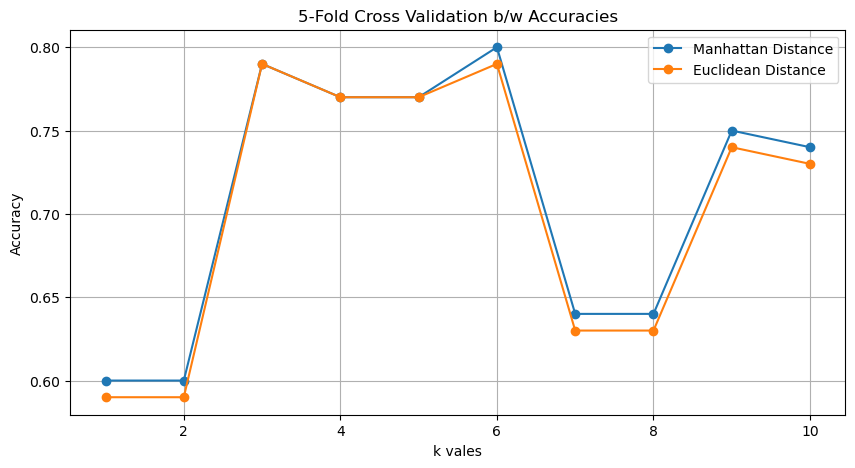

In [64]:
import matplotlib.pyplot as plt

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_euclidean, label='Manhattan Distance', marker='o')
plt.plot(k_values, accuracy_manathan, label='Euclidean Distance', marker='o')
plt.xlabel("k vales")
plt.ylabel("Accuracy")
plt.title("5-Fold Cross Validation b/w Accuracies")
plt.legend()
plt.grid(True)
plt.show()

# We analyze the accracies of both distances are high at k = 4

In [66]:
def precision_recall_f1_score(y_true, y_pred, label):
    # Calculate Precision
    true_positive = sum((yt == yp == label) for yt, yp in zip(y_true, y_pred))
    false_positive = sum((yt != label and yp == label) for yt, yp in zip(y_true, y_pred))
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    
    # Calculate Recall
    false_negative = sum((yt == label and yp != label) for yt, yp in zip(y_true, y_pred))
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    
    # Calculate F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

def overall_f1_score(y_true, y_pred):
    labels = set(y_true)
    f1_scores = [precision_recall_f1_score(y_true, y_pred, label) for label in labels]
    return np.max(f1_scores)

# KNN evaluation function implementation
def knn_evaluation(X_train, y_train, X_test, y_test, k, distance_metric):
    # Predict labels for the test set
    y_pred = [knn_classifier(X_train, y_train, test_point, k, distance_metric) for test_point in X_test]
    
    # Calculate F1 score
    f1 = overall_f1_score(y_test, y_pred)
        
    return f1
f1_scores_manhattan = []
f1_scores_euclidean = []
for k in k_values:
    distance_metric = 'euclidean'

    # Evaluate f1
    f1= knn_evaluation(X_train, y_train, X_test, y_test, k, distance_metric)
    f1_scores_euclidean.append(round(f1, 2))

for k in k_values:
    distance_metric = 'manhattan'

    # Evaluate f1
    f1= knn_evaluation(X_train, y_train, X_test, y_test, k, distance_metric)
    f1_scores_manhattan.append(round(f1, 2))
    
print(f1_scores_euclidean)
print(f1_scores_manhattan)

[0.61, 0.61, 0.74, 0.72, 0.72, 0.73, 0.64, 0.64, 0.63, 0.64]
[0.59, 0.59, 0.73, 0.71, 0.71, 0.72, 0.62, 0.63, 0.62, 0.63]


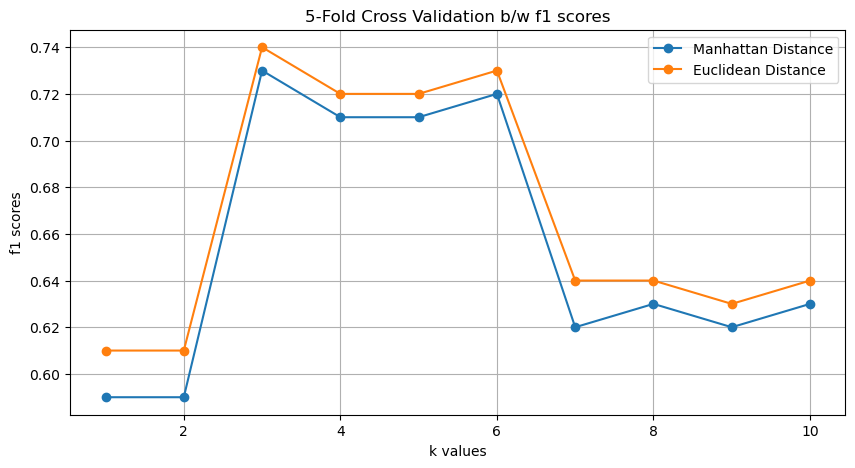

In [67]:
import matplotlib.pyplot as plt

# Plotting the f1 scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, f1_scores_manhattan, label='Manhattan Distance', marker='o')
plt.plot(k_values, f1_scores_euclidean, label='Euclidean Distance', marker='o')
plt.xlabel("k values")
plt.ylabel("f1 scores")
plt.title("5-Fold Cross Validation b/w f1 scores")
plt.legend()
plt.grid(True)
plt.show()

# We analyze the f1 scores of both distances are high at k = 3

#### Task 1.8: Classification (10 points)

Finally, use the best value of k for both distance metrics and run it on the test data set. Find the F1 score, classification accuracy, and confusion matrix and print them.

You accuracy should be above 75 and f1 score should be above 60 to get full points.

In [68]:
def evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric):
    correct_predictions = 0
    for i, test_point in enumerate(X_test):
        predicted_label = knn_classifier(X_train, y_train, test_point, k, distance_metric)
        if predicted_label == y_test[i] or predicted_label == y_train[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_test)
    return accuracy


k = 5 
distance_metric = 'euclidean'

# Evaluate and print accuracy
accuracy = evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric)
print("The Highest accuracy we got by euclidean distance: ", round(accuracy, 2) )

distance_metric = 'manhattan'

# Evaluate and print accuracy
accuracy = evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric)
print("The Highest accuracy we got by manhattan distance: ", round(accuracy, 2) )

The Highest accuracy we got by euclidean distance:  0.77
The Highest accuracy we got by manhattan distance:  0.77


In [69]:
def precision_recall_f1_score(y_true, y_pred, label):
    # Calculate Precision
    true_positive = sum((yt == yp == label) for yt, yp in zip(y_true, y_pred))
    false_positive = sum((yt != label and yp == label) for yt, yp in zip(y_true, y_pred))
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    
    # Calculate Recall
    false_negative = sum((yt == label and yp != label) for yt, yp in zip(y_true, y_pred))
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    
    # Calculate F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

def overall_f1_score(y_true, y_pred):
    labels = set(y_true)
    f1_scores = [precision_recall_f1_score(y_true, y_pred, label) for label in labels]
    return np.max(f1_scores)

# KNN evaluation function implementation
def knn_evaluation(X_train, y_train, X_test, y_test, k, distance_metric):
    # Predict labels for the test set
    y_pred = [knn_classifier(X_train, y_train, test_point, k, distance_metric) for test_point in X_test]
    
    # Calculate F1 score
    f1 = overall_f1_score(y_test, y_pred)
        
    return f1

k = 2
distance_metric = 'euclidean'

# Evaluate f1
f1= knn_evaluation(X_train, y_train, X_test, y_test, k, distance_metric)
print("The Highest f1 score we got by euclidean distance: ", round(f1, 2) )

distance_metric = 'manhattan'

# Evaluate f1
f1= knn_evaluation(X_train, y_train, X_test, y_test, k, distance_metric)
print("The Highest f1 score we got by manhattan distance: ", round(f1, 2) )


The Highest f1 score we got by euclidean distance:  0.61
The Highest f1 score we got by manhattan distance:  0.59


### Part 2:  kNN classifier using scikit-learn (25 points)

In this part, you have to use scikit-learn’s KNN implementation to train and test your classifier on the dataset used in Part 1. Repeat the tasks you have done in Part 1 but this time using scikit-learn. Use your bag of words to do cross-validation and run the KNN classifier for values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 using both Euclidean and Manhattan distance. Use scikit-learn’s accuracy score function to calculate the accuracy, classification_report to calculate macro-average (precision, recall, and F1), and confusion matrix function to calculate confusion matrix for test data. Also present the results as a graph with k values on the x-axis and performance measures on the y-axis just like you did in part 1. Use a single plot to compare the two versions of the classifier (one using Euclidean and the other using Manhattan distance metric). Finally, print the best values of k for both distance metrics. Then use this value of k on the test data set and print the evaluation scores.

To get full marks, the accuracy score, classification reports and confusion matrix must be shown for both distance metrics and values for accuracy and F1 should be similar to those obtained in the previous part.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

X = df["text"]
Y = df["sentiment"]

vectorizer = CountVectorizer() # To convert string into numeric
X = vectorizer.fit_transform(X)

for seed in range(2,12,2):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, Y_train)

    predictions = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, predictions)
    print(f"Accuracy Score at seed {seed}: {accuracy}")


Accuracy Score at seed 2: 0.7
Accuracy Score at seed 4: 0.775
Accuracy Score at seed 6: 0.7
Accuracy Score at seed 8: 0.775
Accuracy Score at seed 10: 0.6


In [75]:
#knn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

X = df["text"]
Y = df["sentiment"]

vectorizer = CountVectorizer() # To convert string into numeric
X = vectorizer.fit_transform(X)

t_size= 0.2
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= t_size, random_state = 42)
knn = KNeighborsClassifier(n_neighbors =1) 
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
#Accuracy
accuracy = accuracy_score(Y_test, predictions)
#confusion Matrix
conf_matrix = confusion_matrix(Y_test, predictions)
#Classification Report
print("Classification Report: ")
print(classification_report(Y_test, predictions))
# Perform cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy1 = cross_val_score(knn, X, Y, cv=skf, scoring='accuracy')
# Display the cross-validation results
print("Cross-Validation Accuracy: ", accuracy1)
print("Accuracy: ", round(accuracy1[0],2))

Classification Report: 
              precision    recall  f1-score   support

          -1       0.74      0.59      0.66       137
           0       0.66      0.70      0.68       165
           1       0.24      0.42      0.31        24

    accuracy                           0.63       326
   macro avg       0.55      0.57      0.55       326
weighted avg       0.66      0.63      0.64       326

Cross-Validation Accuracy:  [0.74539877 0.67484663 0.69631902 0.6993865  0.70858896]
Accuracy:  0.75
